# Description

TODO

# Modules loading

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from clustermatch import conf

# Settings

In [2]:
# ENRICH_FUNCTION = "enrichGO"

In [3]:
# CORRELATION_METHOD_NAME = "clustermatch"

In [4]:
# GENE_SELECTION_STRATEGY = "var_pc_log2"

In [5]:
# # clusterProfiler settings
# ENRICH_FUNCTION = "enrichGO"
# SIMPLIFY_CUTOFF = 0.7
# GO_ONTOLOGIES = ("BP", "CC", "MF")

In [6]:
# SIMILARITY_MATRICES_DIR = conf.GTEX["SIMILARITY_MATRICES_DIR"]
# display(SIMILARITY_MATRICES_DIR)

In [7]:
# SIMILARITY_MATRIX_FILENAME_TEMPLATE = conf.GTEX["SIMILARITY_MATRIX_FILENAME_TEMPLATE"]
# display(SIMILARITY_MATRIX_FILENAME_TEMPLATE)

# Paths

In [8]:
INPUT_FILE = conf.GTEX["GENE_ENRICHMENT_COMBINED_FILE"]
display(INPUT_FILE)
assert INPUT_FILE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_repos/clustermatch-gene-expr/base/results/gtex_v8/gene_set_enrichment/gtex_v8_data-gene_set_enrichment.pkl')

# Load data

In [9]:
df = pd.read_pickle(INPUT_FILE)

In [10]:
df.shape

(1333944, 19)

In [11]:
df.head()

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,fdr,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,results_subset,rich_factor,fold_enrich
0,2,C0,GO:0002443,leukocyte mediated immunity,182,523,0.347992,357,3528,0.101190,5.513573e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.509804,3.438983
1,2,C0,GO:0002250,adaptive immune response,153,523,0.292543,260,3528,0.073696,5.619467e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.588462,3.969584
2,2,C0,GO:0002252,immune effector process,210,523,0.401530,478,3528,0.135488,1.899014e-61,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.439331,2.963591
3,2,C0,GO:0050776,regulation of immune response,178,523,0.340344,372,3528,0.105442,2.790792e-57,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.478495,3.227780
4,2,C0,GO:0006909,phagocytosis,112,523,0.214149,171,3528,0.048469,3.019211e-52,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.654971,4.418235


# QQ plot

In [12]:
PERFORMANCE_MEASURE = "fdr"

In [13]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [14]:
df["results_subset"].unique()

['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']
Categories (6, object): ['BP_full', 'BP_simplified_070', 'CC_full', 'CC_simplified_070', 'MF_full', 'MF_simplified_070']

In [15]:
df_subset = df[
    #     (df.tissue == "whole_blood")
    (df.gene_sel_strategy == "var_pc_log2")
    & (df.clust_method == "SpectralClustering")
    & (df.enrich_func == "enrichGO")
    & (df.results_subset.str.contains("_full"))
]

In [16]:
df_subset.shape

(918175, 19)

In [17]:
df_subset.head()

,n_clusters,cluster_id,go_term_id,go_term_desc,gene_count,gene_total,gene_ratio,bg_count,bg_total,bg_ratio,fdr,tissue,gene_sel_strategy,corr_method,clust_method,enrich_func,results_subset,rich_factor,fold_enrich
0,2,C0,GO:0002443,leukocyte mediated immunity,182,523,0.347992,357,3528,0.101190,5.513573e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.509804,3.438983
1,2,C0,GO:0002250,adaptive immune response,153,523,0.292543,260,3528,0.073696,5.619467e-64,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.588462,3.969584
2,2,C0,GO:0002252,immune effector process,210,523,0.401530,478,3528,0.135488,1.899014e-61,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.439331,2.963591
3,2,C0,GO:0050776,regulation of immune response,178,523,0.340344,372,3528,0.105442,2.790792e-57,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.478495,3.227780
4,2,C0,GO:0006909,phagocytosis,112,523,0.214149,171,3528,0.048469,3.019211e-52,adipose_subcutaneous,var_pc_log2,clustermatch,SpectralClustering,enrichGO,BP_full,0.654971,4.418235


In [18]:
df_methods = df_subset["corr_method"].unique()
display(df_methods)

['clustermatch', 'pearson_abs', 'spearman_abs']
Categories (3, object): ['clustermatch', 'pearson_abs', 'spearman_abs']

In [19]:
results_per_method = {}

for m in df_methods:
    df_values = df_subset[df_subset.corr_method == m][PERFORMANCE_MEASURE]
    display(f"{m} - {df_values.shape[0]}")

    if PERFORMANCE_MEASURE == "fdr":
        df_values = -np.log10(df_values)

    results_per_method[m] = df_values.quantile(QUANTILES).to_numpy()

'clustermatch - 296615'

'pearson_abs - 339869'

'spearman_abs - 281691'

In [20]:
quantiles_df = pd.DataFrame(results_per_method)

In [21]:
quantiles_df.shape

(10000, 3)

In [22]:
quantiles_df.head()

,clustermatch,pearson_abs,spearman_abs
0,1.301039,1.301030,1.301031
1,1.301132,1.301134,1.301156
2,1.301244,1.301204,1.301214
3,1.301312,1.301354,1.301359
4,1.301366,1.301483,1.301435


In [23]:
quantiles_df.describe()

,clustermatch,pearson_abs,spearman_abs
count,10000.000000,10000.000000,10000.000000
mean,4.474658,4.253553,4.657743
std,7.654754,6.923096,9.127060
min,1.301039,1.301030,1.301031
25%,1.614149,1.627797,1.579581
50%,2.270460,2.291244,2.193490
75%,3.946900,4.005389,3.832716
max,199.793247,195.727139,202.167014


Text(0.5, 1.0, 'Gene Ontology (fdr)')

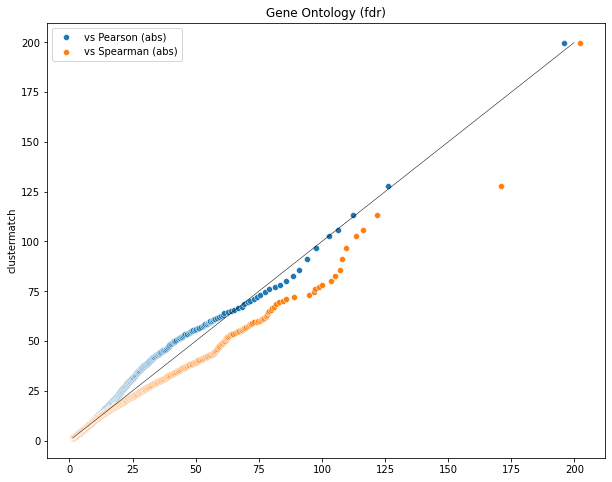

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson_abs",
    y="clustermatch",
    label="vs Pearson (abs)",
    ax=ax,
)

sns.scatterplot(
    data=quantiles_df,
    x="spearman_abs",
    y="clustermatch",
    label="vs Spearman (abs)",
    ax=ax,
)

ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title(f"Gene Ontology ({PERFORMANCE_MEASURE})")

Clustermatch (multi pattern) outperforms pearson (linear and abs), although pearson find most significant associations towards the
right end of the distribution.

However, Clustermatch does not outperform spearman (monotonic and abs), which provides more significant results across the entire distribution.